In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_excel('covid19_clinical_dataset.xlsx')

In [3]:
df=pd.DataFrame(ds)

In [4]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(5644, 111)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [9]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


# checking null values

In [10]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [11]:
df.fillna(0,inplace=True)

In [12]:
df.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
HCO3 (arterial blood gas analysis)                       0
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Length: 111, dtype: int64

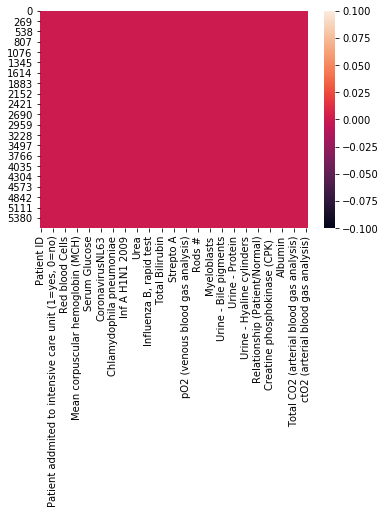

In [13]:
sns.heatmap(df.isnull())

we have filled the all nan values with 0 as there is no result from or zero result from that variable.....and now there is no null values in this dataset

In [28]:
df.drop('Patient ID',axis=1,inplace=True)

In [29]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=110)

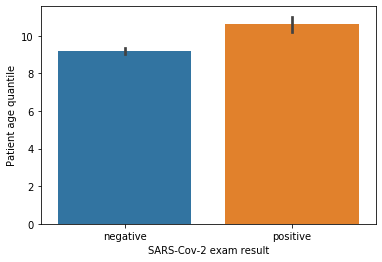

In [15]:
sns.barplot(df['SARS-Cov-2 exam result'],df['Patient age quantile'])

higher the age higher the chances of positive

# Labeling

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['SARS-Cov-2 exam result']=le.fit_transform(df['SARS-Cov-2 exam result'])

In [19]:
df['SARS-Cov-2 exam result'].unique()

array([0, 1])

# Correlation

In [20]:
df.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.075244,4.616576e-02,0.015736,-0.035772,0.031292,0.019498,-0.051183,0.038392,-0.012099,...,-0.016286,-0.034110,0.041484,0.041507,0.006264,0.012090,-0.007157,-0.021239,-4.135060e-02,-0.004455
SARS-Cov-2 exam result,0.075244,1.000000,1.424375e-01,0.019364,0.027586,0.037396,0.039530,-0.106482,0.040622,0.045766,...,0.015189,-0.037511,0.015111,0.036451,-0.028879,-0.024761,0.036186,-0.030815,-5.314858e-03,0.030967
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,0.142437,1.000000e+00,-0.011264,-0.010192,-0.071569,-0.075363,-0.150186,-0.010687,-0.043593,...,0.051133,-0.058510,0.008632,0.052540,-0.041230,-0.034427,0.027247,-0.040326,-4.491712e-11,0.070462
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,0.019364,-1.126431e-02,1.000000,-0.008087,-0.161800,-0.157295,0.006185,-0.020840,-0.122487,...,-0.199293,0.040333,-0.080640,-0.063793,-0.040144,-0.048656,-0.120723,-0.025106,5.392442e-02,-0.017481
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,0.027586,-1.019207e-02,-0.008087,1.000000,-0.151409,-0.147314,0.103724,-0.060529,-0.099364,...,0.111363,0.094293,0.064385,-0.056863,0.134375,0.130018,0.049237,0.105651,3.943719e-02,-0.121242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.012090,-0.024761,-3.442683e-02,-0.048656,0.130018,-0.067014,-0.087151,0.025061,0.055542,-0.051618,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.082657,-1.375525e-01,-0.434762
pO2 (arterial blood gas analysis),-0.007157,0.036186,2.724735e-02,-0.120723,0.049237,0.024449,0.016877,-0.025850,-0.047159,0.038621,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.181270,-1.016304e-01,0.270951
Arteiral Fio2,-0.021239,-0.030815,-4.032552e-02,-0.025106,0.105651,0.012284,-0.000655,0.081845,0.013618,-0.045810,...,-0.017055,0.381415,-0.227696,-0.376063,0.134155,0.082657,-0.181270,1.000000,1.259335e-01,-0.196606
Phosphor,-0.041351,-0.005315,-4.491712e-11,0.053924,0.039437,0.036852,0.057834,0.049969,-0.041703,0.035438,...,-0.193765,0.365646,-0.488217,-0.459113,-0.076610,-0.137552,-0.101630,0.125933,1.000000e+00,0.219942


here we can see the relation of variable with the dependent variable that is confirm cases.....how these variable affect the confirmation of covid

In [60]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 1   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 2   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 3   Hematocrit                                             5644 non-null   float64
 4   Hemoglobin                                             5644 non-null   float64
 5   Platelets                                              5644 non-null   float64
 6   Mean platelet volume                                   5644 non-null   float64
 7   Red blood Cells                                        5644 non-null   float64
 8   Lymphocytes                                     

# Setting x and y variable

In [85]:
x=df.iloc[:,2:20]

In [86]:
x.shape

(5644, 18)

In [87]:
y=df.iloc[:,1]

In [88]:
y.shape

(5644,)

# Classification Process

In [92]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [93]:
def max_acc_score(clf,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        a_sc=accuracy_score(y_test,pred)
        if a_sc>max_score:
            max_score=a_sc
            a_state=r
            
    print('max score at random_state of',a_state,'is',max_score)
    return a_state

In [94]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc_score(lg,x,y)

max score at random_state of 70 is 0.9282550930026572


70

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=70)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [97]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.9282550930026572


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1044
           1       0.75      0.07      0.13        85

    accuracy                           0.93      1129
   macro avg       0.84      0.53      0.55      1129
weighted avg       0.92      0.93      0.90      1129



[[1042    2]
 [  79    6]]


In [98]:
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.89991143 0.89902569 0.90434012 0.91408326 0.89716312]
0.9029047233163097
0.006066181740747562


In [99]:
#auc_roc_score
pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         0.00383142 0.00383142 0.00670498
 0.00670498 0.01149425 0.01340996 0.01340996 0.01436782 0.01436782
 0.02681992 0.02873563 0.03639847 0.03639847 0.04597701 0.04597701
 0.04789272 0.06034483 0.94731801 1.        ]


[0.         0.01176471 0.07058824 0.07058824 0.08235294 0.08235294
 0.09411765 0.10588235 0.10588235 0.11764706 0.11764706 0.14117647
 0.14117647 0.14117647 0.14117647 0.15294118 0.15294118 0.16470588
 0.16470588 0.16470588 1.         1.        ]


[1.74972633e+00 7.49726328e-01 5.68387670e-01 4.43315329e-01
 4.39074639e-01 3.63825423e-01 3.55185589e-01 3.49315077e-01
 3.15668007e-01 2.99524582e-01 2.92295160e-01 2.86709207e-01
 1.98140157e-01 1.95555584e-01 1.56967754e-01 1.56172338e-01
 1.24867460e-01 1.16682449e-01 1.16409755e-01 9.43132118e-02
 9.42256123e-02 9.67357243e-04]


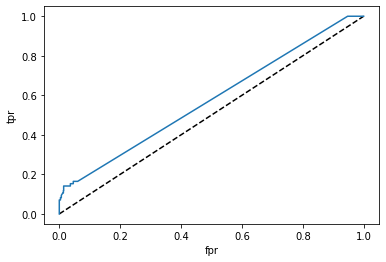

In [100]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [101]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.5343362632409285

In [102]:
lg_score=accuracy_score(y_test,pred),cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt=DecisionTreeClassifier()
max_acc_score(dt,x,y)

max score at random_state of 58 is 0.9202834366696191


58

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=58)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [106]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.9220549158547388


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1036
           1       0.65      0.12      0.20        93

    accuracy                           0.92      1129
   macro avg       0.79      0.56      0.58      1129
weighted avg       0.90      0.92      0.90      1129



[[1030    6]
 [  82   11]]


In [107]:
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.88131089 0.89548273 0.90434012 0.90522586 0.875     ]
0.8922719220549158
0.01218374974666979


In [108]:
#auc_roc_score
pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.00579151 0.01061776 0.8957529  1.        ]


[0.         0.11827957 0.11827957 0.94623656 1.        ]


[2.         1.         0.5        0.09710434 0.        ]


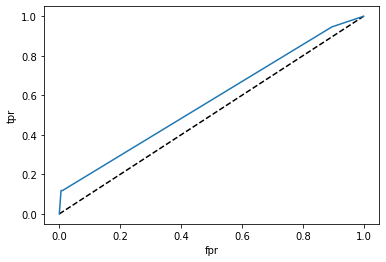

In [109]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='decision tree classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [110]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.5562440320504837

In [111]:
dt_score=accuracy_score(y_test,pred),cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# KNeighborsClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 2}

In [113]:
knn=KNeighborsClassifier(n_neighbors=2)
sc=max_acc_score(knn,x,y)

max score at random_state of 70 is 0.9229406554472985


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=70)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [115]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.9229406554472985


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1044
           1       0.40      0.05      0.08        85

    accuracy                           0.92      1129
   macro avg       0.66      0.52      0.52      1129
weighted avg       0.89      0.92      0.89      1129



[[1038    6]
 [  81    4]]


In [116]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.89813995 0.89991143 0.90256864 0.90168291 0.90336879]
0.9011343434533794
0.001887477105026904


In [117]:
#auc_roc_score
pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.00574713 0.02298851 1.        ]


[0.         0.04705882 0.10588235 1.        ]


[2.  1.  0.5 0. ]


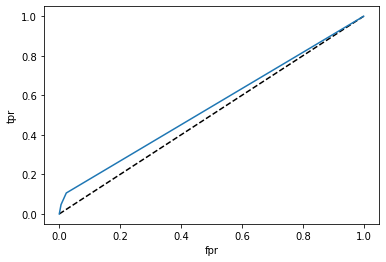

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='kneighbors classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [119]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.5206558485463151

In [120]:
knn_score=accuracy_score(y_test,pred),cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# SVC

In [123]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
max_acc_score(svc,x,y)

max score at random_state of 70 is 0.9247121346324181


70

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=70)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [125]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.9247121346324181


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1044
           1       0.00      0.00      0.00        85

    accuracy                           0.92      1129
   macro avg       0.46      0.50      0.48      1129
weighted avg       0.86      0.92      0.89      1129



[[1044    0]
 [  85    0]]


In [126]:
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.89991143 0.90079717 0.90079717 0.90079717 0.88741135]
0.8979428540916772
0.00527691556433724


In [127]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.5

In [128]:
svc_score=accuracy_score(y_test,pred),cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# GradientBoostingClassifier

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
gb=GradientBoostingClassifier()
pr={'learning_rate':[.0001,.001,.01,.1,1],'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 150}

In [131]:
gb=GradientBoostingClassifier(learning_rate=.01,n_estimators=150)
max_acc_score(gb,x,y)

max score at random_state of 91 is 0.9264836138175376


91

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [133]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.9264836138175376


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1042
           1       0.75      0.07      0.13        87

    accuracy                           0.93      1129
   macro avg       0.84      0.53      0.54      1129
weighted avg       0.91      0.93      0.90      1129



[[1040    2]
 [  81    6]]


In [134]:
score=cross_val_score(gb,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.90079717 0.89813995 0.90434012 0.90522586 0.90159574]
0.902019768953885
0.002545217687707652


In [135]:
#auc_roc_score
pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.59692898e-04
 1.91938580e-03 1.91938580e-03 2.87907869e-03 2.87907869e-03
 3.83877159e-03 3.83877159e-03 6.71785029e-03 6.71785029e-03
 8.63723608e-03 9.59692898e-03 1.15163148e-02 1.15163148e-02
 1.63147793e-02 1.63147793e-02 3.45489443e-02 9.40499040e-01
 9.77927063e-01 9.79846449e-01 9.90403071e-01 9.92322457e-01
 1.00000000e+00]


[0.         0.01149425 0.05747126 0.05747126 0.06896552 0.08045977
 0.08045977 0.09195402 0.09195402 0.11494253 0.11494253 0.12643678
 0.12643678 0.17241379 0.17241379 0.18390805 0.18390805 0.1954023
 0.1954023  1.         1.         1.         1.         1.
 1.        ]


[1.69696722 0.69696722 0.62472765 0.61398271 0.60830608 0.44918818
 0.43441105 0.42434461 0.38550283 0.3098801  0.26509269 0.26384649
 0.23079865 0.2150209  0.20366163 0.19937999 0.15990386 0.15704203
 0.1005809  0.09924907 0.06101959 0.05920825 0.05359221 0.05332654
 0.03917842]


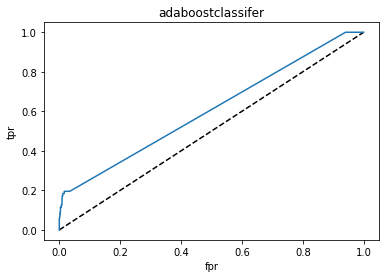

In [136]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradientboost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('adaboostclassifer')
plt.show()

In [137]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.533523065722417

In [138]:
gb_score=accuracy_score(y_test,pred),cross_val_score(gb,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# saving the model

In [140]:
data={'logistic':lg_score,'kneighbors':knn_score,'decisiontreeclassifier':dt_score,'SVC':svc_score,'gradientboost':gb_score}

In [141]:
selection=pd.DataFrame(data,index=['accuracy_score','cross_val_score','roc_score'])

In [142]:
selection

,logistic,kneighbors,decisiontreeclassifier,SVC,gradientboost
accuracy_score,0.928255,0.922941,0.922055,0.924712,0.926484
cross_val_score,0.902905,0.901134,0.895285,0.897943,0.901842
roc_score,0.534336,0.520656,0.556244,0.500000,0.533523


In [143]:
from sklearn.externals import joblib

In [144]:
joblib.dump(gb,'gb_model_covid_confirm_by_clinicaldata.obj')

['gb_model_covid_confirm_by_clinicaldata.obj']

# Prediction on the basis of admission in ward

In [145]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=110)

In [149]:
df1=df.iloc[:,:20]

In [150]:
df1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose
0,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648
2,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [151]:
df1.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose'],
      dtype='object')

In [172]:
#setting the x variable
x=df1.iloc[:,5:]

In [173]:
x.head()

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [174]:
x['confirm case']=df['SARS-Cov-2 exam result']

In [175]:
x.head()

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,confirm case
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [176]:
# setting y variable
y=df[['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)']]

In [177]:
y

,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
5639,0,0,0
5640,0,0,0
5641,0,0,0
5642,0,0,0


# Classification

# decisiontreeclassifier

In [180]:
dt=DecisionTreeClassifier()
max_acc_score(dt,x,y)

max score at random_state of 82 is 0.9734278122232064


82

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=82)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [182]:
pred

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [184]:
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.95571302 0.97697077 0.97874225 0.97519929 0.90070922]
0.9574669104021005
0.029570219918752843


In [186]:
print(accuracy_score(y_test,pred))

0.9743135518157662


In [187]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.5494734119765425

# KNeighborsClassifier

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 12}

In [189]:
knn=KNeighborsClassifier(n_neighbors=12)
sc=max_acc_score(knn,x,y)

max score at random_state of 82 is 0.9796279893711249


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=82)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [191]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.97962799 0.98671391 0.99202834 0.98582817 0.90514184]
0.969868049928073
0.03260161028598173


In [196]:
pred

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [192]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.5166666666666667

In these two models the DecisionTree model is performing well so we select he decisiontreeclassifier for this problem

In [195]:
joblib.dump(dt,'dt_model_covid_ward_admission.obj')

['dt_model_covid_ward_admission.obj']